<a href="https://colab.research.google.com/github/Ritzing/BhagwatGita/blob/master/BhagwatGita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import collections
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.probability import FreqDist
from scipy.cluster.hierarchy import ward, dendrogram, leaves_list, to_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Ritzing/BhagwatGita/master/Data/bhagavad-gita.csv')

In [0]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [5]:
df.head()

Unnamed: 0  title                                         devanagari  \
0           0    1.1  धृतराष्ट्र उवाच ।\nधर्मक्षेत्रे कुरुक्षेत्रे स...   
1           1    1.2  सञ्जय उवाच ।\nदृष्ट्वा तु पाण्डवानीकं व्यूढं द...   
2           2    1.3  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।\n...   
3           3    1.4  अत्र शूरा महेष्वासा भीमार्जुनसमा युधि ।\nयुयुध...   
4           4    1.5  धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् ।\nपु...   

                                          verse_text  \
0  dhṛtarāṣṭra uvāca\ndharma-kṣetre kuru-kṣetre\n...   
1  sañjaya uvāca\ndṛṣṭvā tu pāṇḍavānīkaṁ\nvyūḍhaṁ...   
2  paśyaitāṁ pāṇḍu-putrānām\nācārya mahatīṁ camūm...   
3  atra śūrā maheṣv-āsā\nbhīmārjuna-samā yudhi\ny...   
4  dhṛṣṭaketuś cekitānaḥ\nkāśirājaś ca vīryavān\n...   

                               verse_text_no_samdhis  
0  dhṛtarāṣṭraḥ uvāca dharma kṣetre kuru kṣetre s...  
1  sañjayaḥ uvāca dṛṣṭvā tu pāṇḍava anīkam vyūḍha...  
2  paśya etām pāṇḍu putrānām ācārya mahatīm camūm...  
3  atra śūrāḥ mahā iṣu āsāḥ bhīma arjuna samāḥ yu...  
4  dhṛṣṭaketuḥ cekitānaḥ kāśirājaḥ ca vīrya vān p...

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


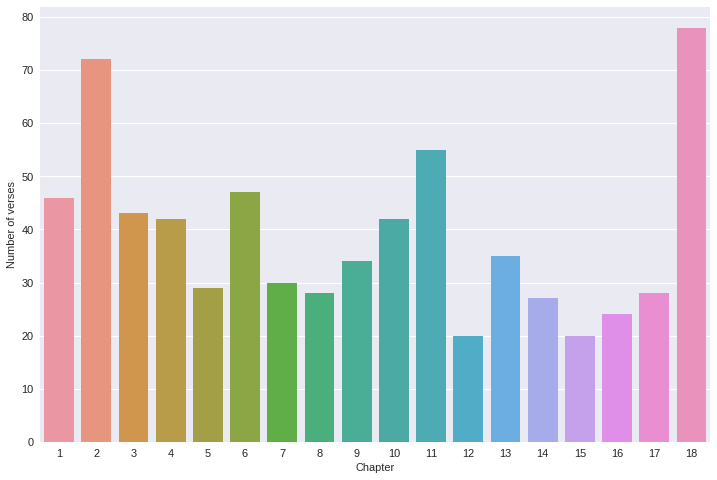

In [6]:
li = df['title'].astype(int)
plt.figure(figsize=(12,8))
plt.tick_params(labelsize=11)
sns.countplot(li)
plt.xlabel("Chapter")
plt.ylabel("Number of verses")
plt.show()

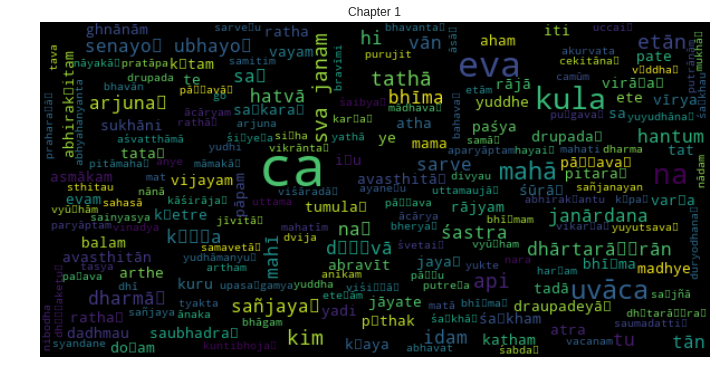

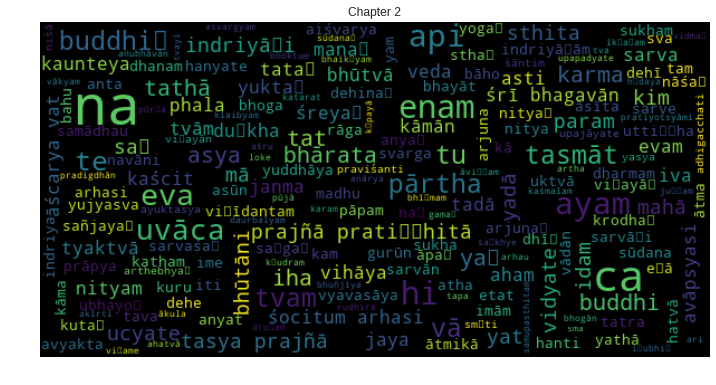

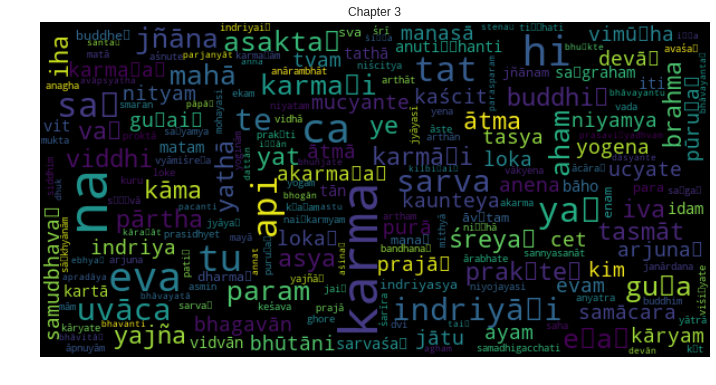

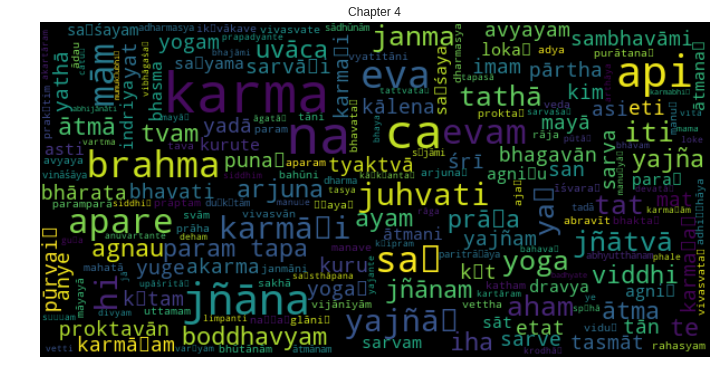

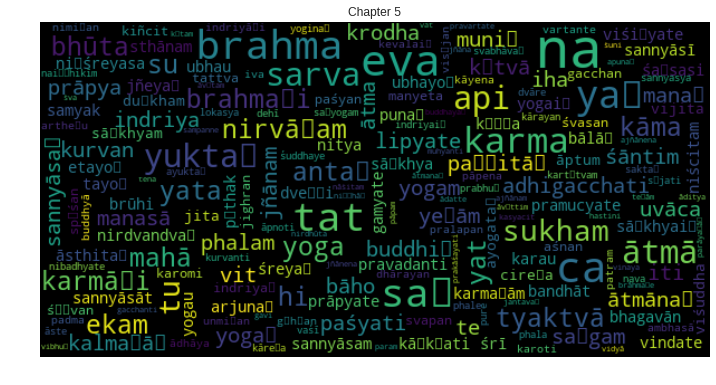

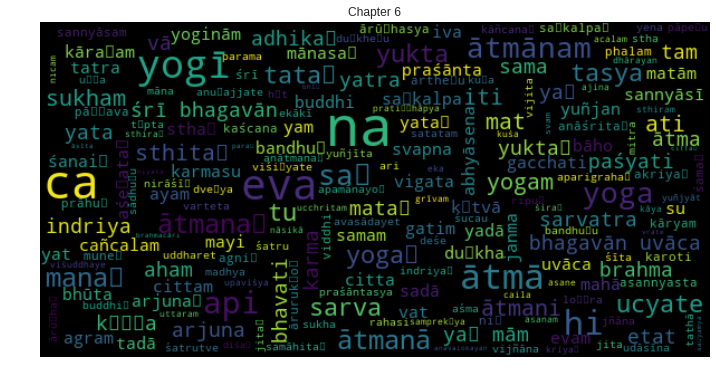

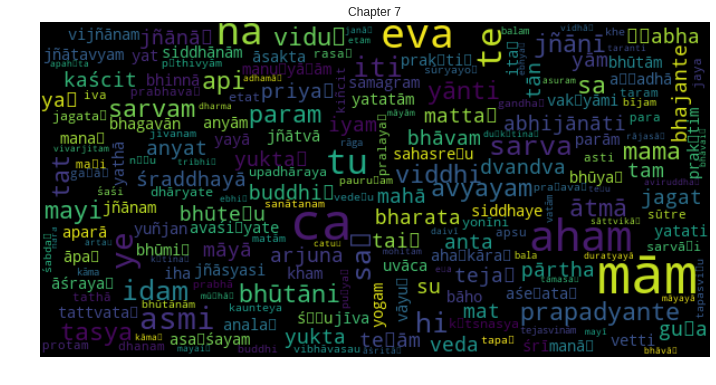

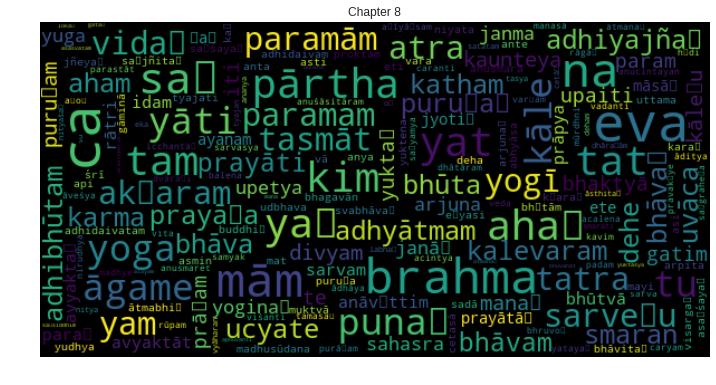

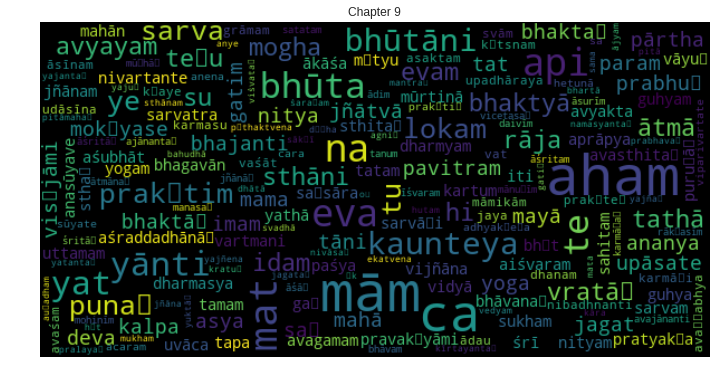

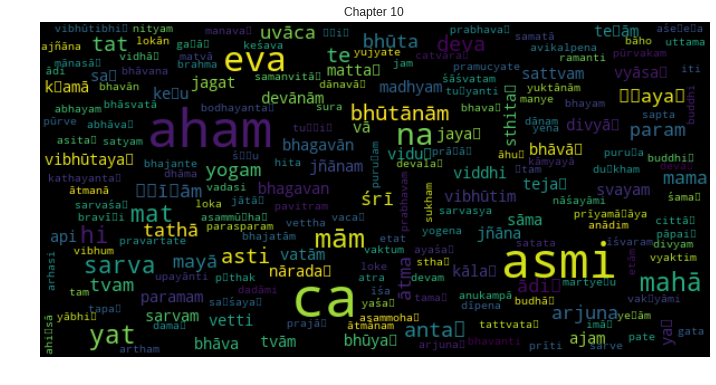

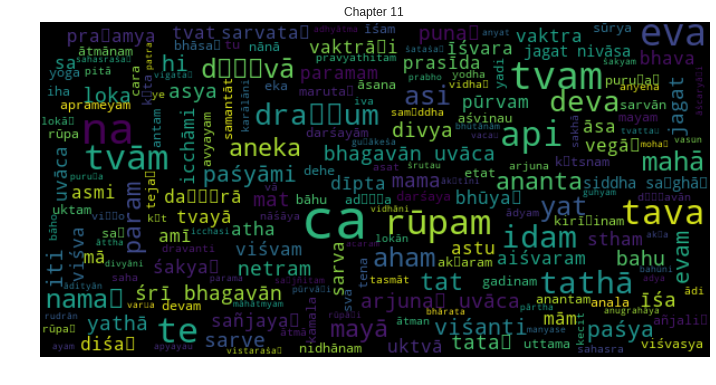

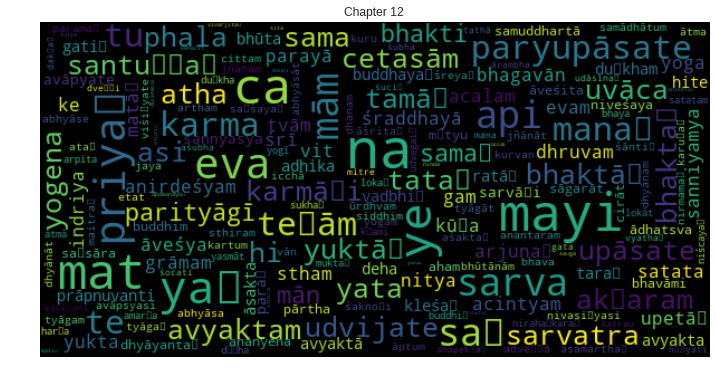

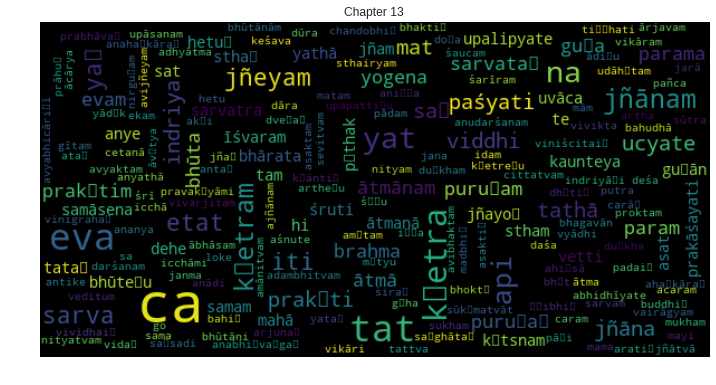

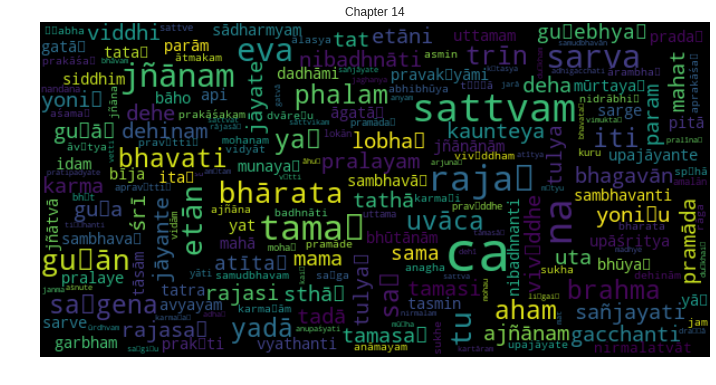

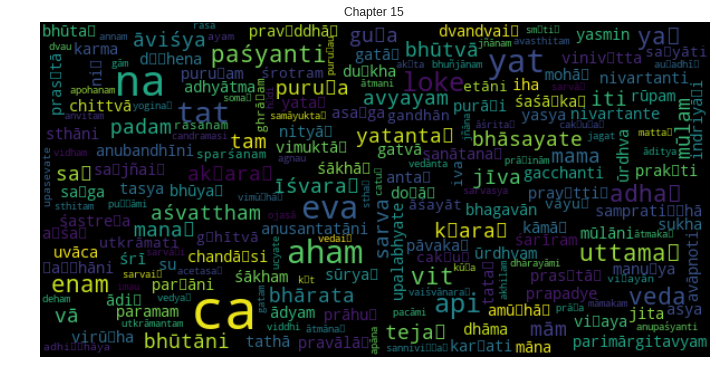

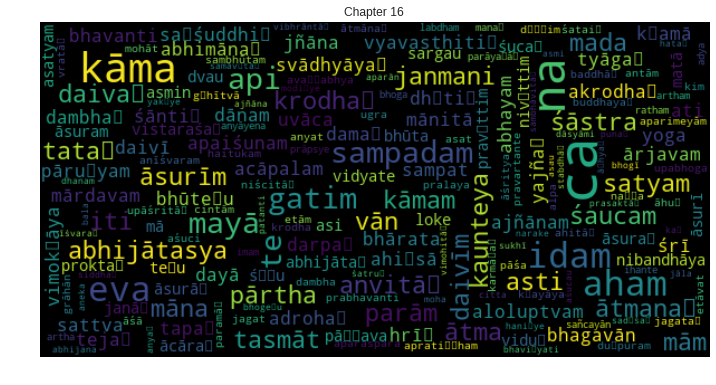

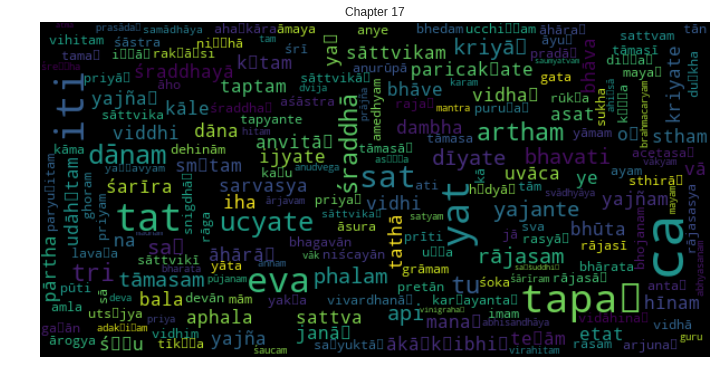

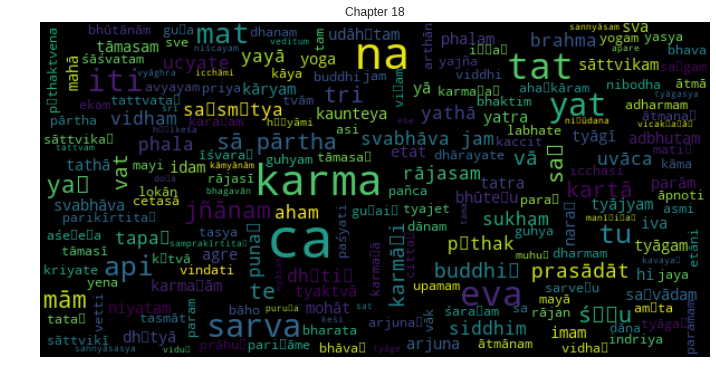

In [7]:
#chapter count
list_counts = li.value_counts()
start = 0
for i in range(1,19):
    chap_length = list_counts[i]
    #print(chap_length)
    chap_df = df[start:start+chap_length]
    start = start + chap_length
    #print(chap_df.shape)
    
    # create wordcloud
    words = chap_df["verse_text_no_samdhis"][~pd.isnull(chap_df["verse_text_no_samdhis"])]
    wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(words))
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Chapter "+ str(i))
    plt.axis("off")


In [0]:
words = df["verse_text_no_samdhis"][~pd.isnull(df["verse_text_no_samdhis"])]

In [0]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300,max_words=2000).generate(' '.join(words))

(-0.5, 599.5, 299.5, -0.5)

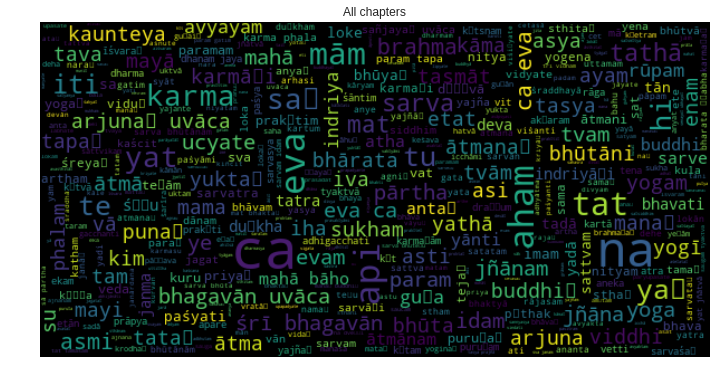

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All chapters")
plt.axis("off")

In [0]:
df.drop(df.columns[[0, 1, 3, 4]], axis=1, inplace=True)


In [14]:
df.head(10)

devanagari
0  धृतराष्ट्र उवाच ।\nधर्मक्षेत्रे कुरुक्षेत्रे स...
1  सञ्जय उवाच ।\nदृष्ट्वा तु पाण्डवानीकं व्यूढं द...
2  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।\n...
3  अत्र शूरा महेष्वासा भीमार्जुनसमा युधि ।\nयुयुध...
4  धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् ।\nपु...
5  युधामन्युश्च विक्रान्त उत्तमौजाश्च वीर्यवान् ।...
6  अस्माकं तु विशिष्टा ये तान्निबोध द्विजोत्तम ।\...
7  भवान्भीष्मश्च कर्णश्च कृपश्च समितिंजयः ।\nअश्व...
8  अन्ये च बहवः शूरा मदर्थे त्यक्तजीविताः ।\nनाना...
9  अपर्याप्तं तदस्माकं बलं भीष्माभिरक्षितम् ।\nपर...

In [0]:
df = df.apply(lambda row: row['devanagari'].replace('।',' ').strip().split(), axis=1)

In [16]:
df.head(10)

0    [धृतराष्ट्र, उवाच, धर्मक्षेत्रे, कुरुक्षेत्रे,...
1    [सञ्जय, उवाच, दृष्ट्वा, तु, पाण्डवानीकं, व्यूढ...
2    [पश्यैतां, पाण्डुपुत्राणामाचार्य, महतीं, चमूम्...
3    [अत्र, शूरा, महेष्वासा, भीमार्जुनसमा, युधि, यु...
4    [धृष्टकेतुश्चेकितानः, काशिराजश्च, वीर्यवान्, प...
5    [युधामन्युश्च, विक्रान्त, उत्तमौजाश्च, वीर्यवा...
6    [अस्माकं, तु, विशिष्टा, ये, तान्निबोध, द्विजोत...
7    [भवान्भीष्मश्च, कर्णश्च, कृपश्च, समितिंजयः, अश...
8    [अन्ये, च, बहवः, शूरा, मदर्थे, त्यक्तजीविताः, ...
9    [अपर्याप्तं, तदस्माकं, बलं, भीष्माभिरक्षितम्, ...
dtype: object

In [0]:
data = []
for row in df:
    temp = []
    for words in row:
        if len(words)>3:
            temp.append(words)
    data.append(temp)
data_flat = [item for sublist in data for item in sublist]

In [18]:
# as per my knowledge of this holy document it makes sense to see these results because of the words used such as भारत, अर्जुन, कर्म, ज्ञानं.
top_10 = [i[0] for i in sorted(dict(collections.Counter(data_flat)).items(), key=lambda k: k[1], reverse=True)[:10]]
top_10

['पार्थ',
 'उवाच',
 'कर्म',
 'श्रीभगवानुवाच',
 'कौन्तेय',
 'अर्जुन',
 'भारत',
 'ज्ञानं',
 'त्वां',
 'महाबाहो']

In [19]:
from nltk.text import Text  
bgita = Text(data_flat)
bgita.concordance('भारत')

Displaying 22 of 22 matches:
्जय उवाच एवमुक्तो हृषीकेशो गुडाकेशेन भारत सेनयोरुभयोर्मध्ये स्थापयित्वा रथोत्त
्णीं बभूव तमुवाच हृषीकेशः प्रहसन्निव भारत सेनयोरुभयोर्मध्ये विषीदन्तमिदं २.१० 
ः आगमापायिनोऽनित्यास्तांस्तितिक्षस्व भारत २.१४ व्यथयन्त्येते पुरुषं पुरुषर्षभ 
णः अनाशिनोऽप्रमेयस्य तस्माद्युध्यस्व भारत २.१८ वेत्ति हन्तारं यश्चैनं मन्यते ह
२७ अव्यक्तादीनि भूतानि व्यक्तमध्यानि भारत अव्यक्तनिधनान्येव तत्र परिदेवना २.२८
.२९ देही नित्यमवध्योऽयं देहे सर्वस्य भारत तस्मात्सर्वाणि भूतानि त्वं शोचितुमर्
२४ सक्ताः कर्मण्यविद्वांसो कुर्वन्ति भारत कुर्याद्विद्वांस्तथासक्तश्चिकीर्षुर्
भवाम्यात्ममायया धर्मस्य ग्लानिर्भवति भारत अभ्युत्थानमधर्मस्य तदात्मानं सृजाम्य
 छित्त्वैनं संशयं योगमातिष्ठोत्तिष्ठ भारत ४.४२ अर्जुन उवाच संन्यासं कर्मणां कृ
.२६ इच्छाद्वेषसमुत्थेन द्वन्द्वमोहेन भारत सर्वभूतानि संमोहं सर्गे यान्ति परन्त
ा बहून्यदृष्टपूर्वाणि पश्याश्चर्याणि भारत ११.६ इहैकस्थं जगत्कृत्स्नं पश्याद्य 
षेत्रज्ञं चापि विद्धि सर्वक्षेत्रेषु भारत क्षेत्रक्षेत्रज्ञयोर्ज्ञानं यत्तज्ज्
क्षेत्रं क्षेत्री कृत्स

In [20]:
def jaccard(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

sim = 0.0
for i in data:
    for j in data:
        score = jaccard(set(i), set(j))
        if score > sim and i!=j:
            sim = score
            doc1 = i
            doc2 = j

print (round(sim*100, 2),'%', doc1, doc2)

41.67 % ['मन्मना', 'मद्भक्तो', 'मद्याजी', 'नमस्कुरु', 'मामेवैष्यसि', 'युक्त्वैवमात्मानं', 'मत्परायणः', '९.३४'] ['मन्मना', 'मद्भक्तो', 'मद्याजी', 'नमस्कुरु', 'मामेवैष्यसि', 'सत्यं', 'प्रतिजाने', 'प्रियोऽसि', '१८.६५']


In [0]:
model = Word2Vec(data, size=100, window=10, min_count=2, workers=4)

In [22]:
model.most_similar('अर्जुन')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('दुःखं', 0.25681906938552856),
 ('पार्थ', 0.25667518377304077),
 ('उपासते', 0.2543703019618988),
 ('उच्यते', 0.2505922317504883),
 ('त्वदन्येन', 0.24820514023303986),
 ('क्रोधं', 0.24414396286010742),
 ('तस्य', 0.24297279119491577),
 ('लभन्ते', 0.23284046351909637),
 ('बुद्धिं', 0.2181519865989685),
 ('प्रसभं', 0.21530598402023315)]